In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-23 00:00:00+09:00,27428.410156,27452.669922,27326.910156,27382.560547,71500000,0.0,0.0
2023-01-30 00:00:00+09:00,27384.769531,27612.570312,27302.220703,27509.460938,372200000,0.0,0.0
2023-02-06 00:00:00+09:00,27764.660156,27821.220703,27424.689453,27670.980469,382200000,0.0,0.0
2023-02-13 00:00:00+09:00,27550.349609,27727.660156,27266.939453,27513.130859,335200000,0.0,0.0
2023-02-20 00:00:00+09:00,27497.130859,27538.289062,27046.080078,27453.480469,274800000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-23 00:00:00+09:00,39040.718750,40398.230469,38847.128906,40281.160156,626400000,0.0,0.0
2024-12-30 00:00:00+09:00,40325.781250,40325.781250,39864.460938,39894.539062,110600000,0.0,0.0
2025-01-06 00:00:00+09:00,39945.421875,40288.800781,39166.050781,39190.398438,613900000,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-27 00:00:00+09:00,23427.900391,23463.890625,22892.949219,23205.179688,326700000,0.0,0.0
2020-02-03 00:00:00+09:00,22874.269531,23995.369141,22775.919922,23827.980469,371200000,0.0,0.0
2020-02-10 00:00:00+09:00,23631.789062,23908.849609,23603.480469,23687.589844,264700000,0.0,0.0
2020-02-17 00:00:00+09:00,23489.779297,23806.560547,23133.599609,23386.740234,300500000,0.0,0.0
2020-02-24 00:00:00+09:00,22949.369141,22950.230469,20916.400391,21142.960938,459800000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-23 00:00:00+09:00,39040.718750,40398.230469,38847.128906,40281.160156,626400000,0.0,0.0
2024-12-30 00:00:00+09:00,40325.781250,40325.781250,39864.460938,39894.539062,110600000,0.0,0.0
2025-01-06 00:00:00+09:00,39945.421875,40288.800781,39166.050781,39190.398438,613900000,0.0,0.0


In [3]:
period = 26
r_last = len(df0)
r1 = 0
df0['Median'] = np.nan
df0['Q1'] = np.nan
df0['Q3'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    med = np.median(df1['Close'])
    q3, q1 = np.percentile(df1['Close'], [75, 25])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)  # 下限を設定
    upper_bound = q3 + (1.5 * iqr)  # 上限を設定
    name_index = df0.index[r2]
    df0.at[name_index, 'Median'] = med
    df0.at[name_index, 'Q1'] = q1
    df0.at[name_index, 'Q3'] = q3
    df0.at[name_index, 'Lower'] = lower_bound
    df0.at[name_index, 'Upper'] = upper_bound
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2020-01-27 00:00:00+09:00,23427.900391,23463.890625,22892.949219,23205.179688,326700000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-03 00:00:00+09:00,22874.269531,23995.369141,22775.919922,23827.980469,371200000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-10 00:00:00+09:00,23631.789062,23908.849609,23603.480469,23687.589844,264700000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-17 00:00:00+09:00,23489.779297,23806.560547,23133.599609,23386.740234,300500000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-24 00:00:00+09:00,22949.369141,22950.230469,20916.400391,21142.960938,459800000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00+09:00,39040.718750,40398.230469,38847.128906,40281.160156,626400000,0.0,0.0,38639.265625,37948.859375,39492.888672,35632.815430,41808.932617
2024-12-30 00:00:00+09:00,40325.781250,40325.781250,39864.460938,39894.539062,110600000,0.0,0.0,38639.265625,37948.859375,39492.888672,35632.815430,41808.932617
2025-01-06 00:00:00+09:00,39945.421875,40288.800781,39166.050781,39190.398438,613900000,0.0,0.0,38639.265625,37948.859375,39492.888672,35632.815430,41808.932617


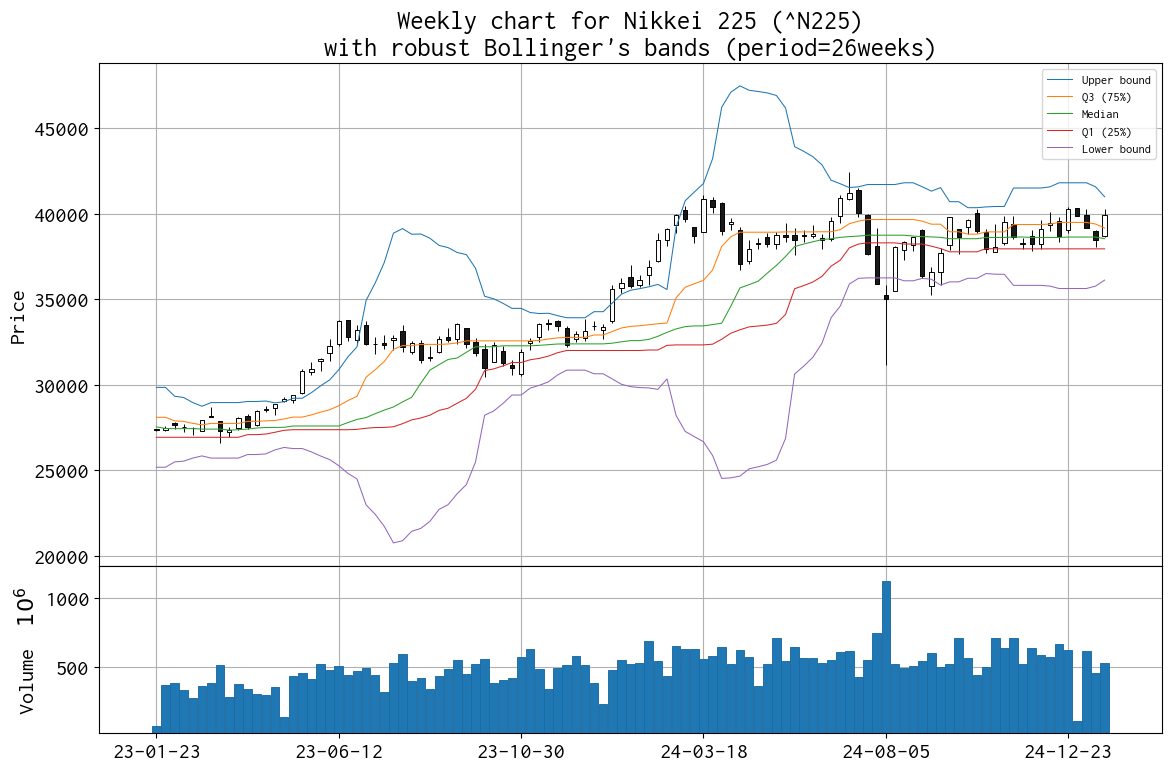

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=0.75, label='Upper bound', ax=ax[0]),
    mpf.make_addplot(mv_q3[df.index], width=0.75, label='Q3 (75%)', ax=ax[0]),
    mpf.make_addplot(mv_median[df.index], width=0.75, label='Median', ax=ax[0]),
    mpf.make_addplot(mv_q1[df.index], width=0.75, label='Q1 (25%)', ax=ax[0]),
    mpf.make_addplot(mv_lower[df.index], width=0.75, label='Lower bound', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    volume=ax[1],
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=26weeks)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=26weeks)' % symbol)

ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_bollinger_robust_n225.png')
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-13 00:00:00+09:00,39010.960938,39054.351562,38055.679688,38451.460938,457100000,0.0,0.0
2025-01-20 00:00:00+09:00,38671.769531,40279.789062,38643.839844,39931.980469,531000000,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-01-13 00:00:00+09:00    38451.460938
2025-01-20 00:00:00+09:00    39931.980469
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-01-13 00:00:00+09:00            NaN
2025-01-20 00:00:00+09:00    1480.519531
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-01-20 00:00:00+09:00    1260.210938
dtype: float64

In [9]:
df['Close'].rolling(13).mean()

Date
2023-01-23 00:00:00+09:00             NaN
2023-01-30 00:00:00+09:00             NaN
2023-02-06 00:00:00+09:00             NaN
2023-02-13 00:00:00+09:00             NaN
2023-02-20 00:00:00+09:00             NaN
                                 ...     
2024-12-23 00:00:00+09:00    38874.661659
2024-12-30 00:00:00+09:00    38971.501502
2025-01-06 00:00:00+09:00    38939.547476
2025-01-13 00:00:00+09:00    38898.756010
2025-01-20 00:00:00+09:00    39053.991286
Name: Close, Length: 105, dtype: float64

In [10]:
df['Close'].rolling(26).mean()

Date
2023-01-23 00:00:00+09:00             NaN
2023-01-30 00:00:00+09:00             NaN
2023-02-06 00:00:00+09:00             NaN
2023-02-13 00:00:00+09:00             NaN
2023-02-20 00:00:00+09:00             NaN
                                 ...     
2024-12-23 00:00:00+09:00    38528.497746
2024-12-30 00:00:00+09:00    38489.350361
2025-01-06 00:00:00+09:00    38412.416466
2025-01-13 00:00:00+09:00    38350.403846
2025-01-20 00:00:00+09:00    38437.502704
Name: Close, Length: 105, dtype: float64

In [11]:
df['Close'].rolling(52).mean()

Date
2023-01-23 00:00:00+09:00             NaN
2023-01-30 00:00:00+09:00             NaN
2023-02-06 00:00:00+09:00             NaN
2023-02-13 00:00:00+09:00             NaN
2023-02-20 00:00:00+09:00             NaN
                                 ...     
2024-12-23 00:00:00+09:00    38349.995944
2024-12-30 00:00:00+09:00    38475.325120
2025-01-06 00:00:00+09:00    38544.811448
2025-01-13 00:00:00+09:00    38592.661283
2025-01-20 00:00:00+09:00    38673.063401
Name: Close, Length: 105, dtype: float64

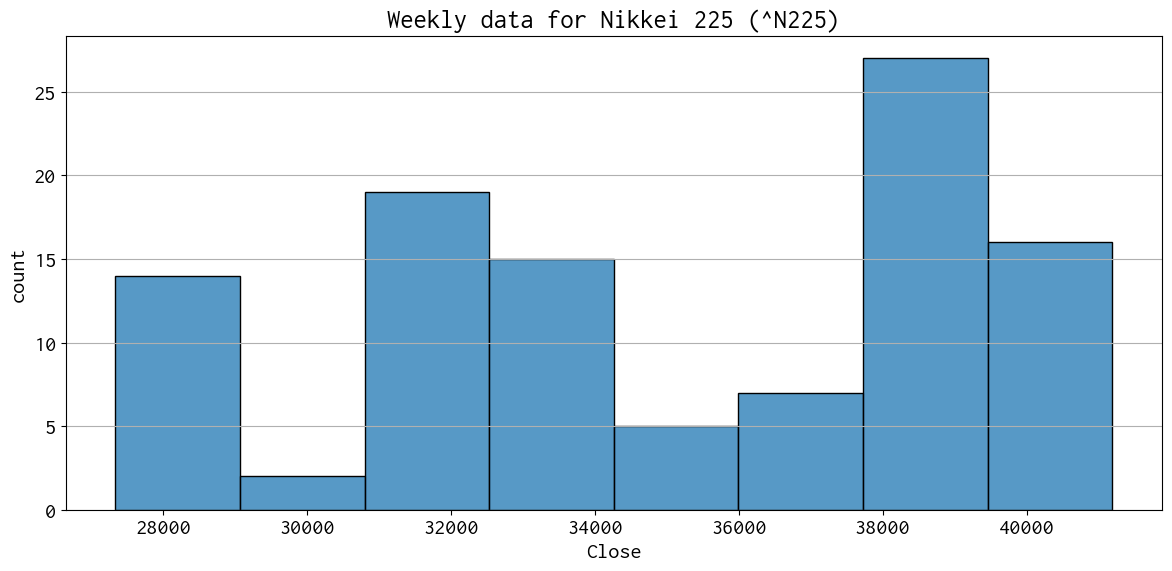

In [12]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

ax = sns.histplot(
  data = df,
  x = "Close"
)
ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('weekly_histogram_n225.png')
plt.show()

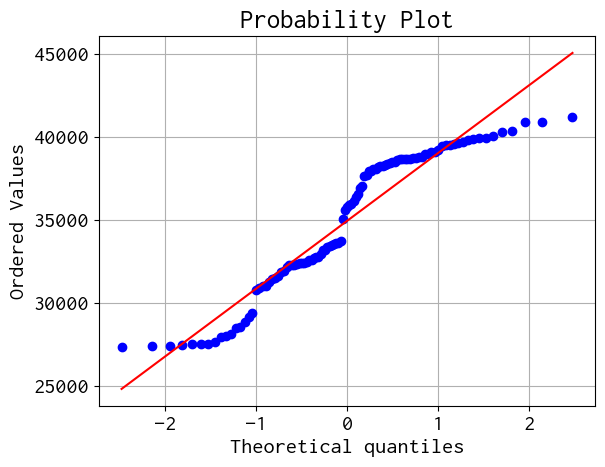

In [13]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

In [14]:
len(df)

105

In [15]:
W, shapiro_p_value = stats.shapiro(df['Close'])
print(f'Shapiro-Wilk test statistic: {W}, p-value: {shapiro_p_value}')

Shapiro-Wilk test statistic: 0.9119975716818348, p-value: 3.3672495383949503e-06
